In [1]:
#%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import squarify
# pip install squarify

from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv("data/Training_set.csv")
df1.head()


,ID,SITECODE,SITENAME,AuthYr,LONDD,LATDD,ELEVATION,POLLEN_SUM (N),ABIES,ACACIA,...,THALICTRUM,TILIA,TRIXCAL,TSUGA,TYPHA,ULMUS,URTICACX,VERBEN,XANTHIUM,ZYGOPHYL
0,1,AB1,Tsyooktuihvyn Lake,"Brubaker, L. and Anderson, P. unpubl.",-147.70,67.37,424,454.0,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2,AB10,ABD10,"Brubaker, L. and Anderson, P. unpubl.",-143.12,67.30,213,497.0,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,3,AB100,Grayling Lake2,"Brubaker, L. and Anderson, P. unpubl.",-150.35,66.80,425,615.0,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,4,AB102,Iqoq Lake,"Brubaker, L. and Anderson, P. unpubl.",-155.73,66.83,145,545.0,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,5,AB103,Selby Lake,"Brubaker, L. and Anderson, P. unpubl.",-155.71,66.86,145,578.0,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


## Dataset bioclimatico

In [162]:
df2 = pd.read_csv("data/bioclimatic_set.csv")
df2.head()

,ID,SITECODE,LONDD,LATDD,ELEVATION,bio_ (1),bio_ (2),bio_ (3),bio_ (4),bio_ (5),...,tmin_ (3),tmin_ (4),tmin_ (5),tmin_ (6),tmin_ (7),tmin_ (8),tmin_ (9),tmin_ (10),tmin_ (11),tmin_ (12)
0,1,AB1,-147.70,67.37,424,-7.254167,11.791667,23.442678,1484.678467,19.799999,...,-26.600000,-17.1,-3.2,5.1,6.7,3.5,-2.9,-12.7,-24.000000,-27.799999
1,2,AB10,-143.12,67.30,213,-7.595833,11.525000,21.582397,1596.741699,20.400000,...,-27.100000,-16.4,-2.6,5.8,7.8,4.8,-2.0,-12.3,-24.900000,-29.299999
2,3,AB100,-150.35,66.80,425,-5.041667,11.583333,24.081774,1393.481323,20.900000,...,-23.500000,-13.5,-1.7,6.0,7.7,5.0,-1.6,-11.1,-21.100000,-24.700001
3,4,AB102,-155.73,66.83,145,-4.866667,11.133333,23.840115,1409.099243,21.100000,...,-23.200001,-13.7,-2.9,5.7,7.9,5.4,-0.5,-9.6,-19.400000,-24.400000
4,5,AB103,-155.71,66.86,145,-4.966667,11.016666,23.897324,1393.969727,20.600000,...,-23.299999,-13.8,-3.1,5.3,7.7,5.5,-0.4,-9.5,-19.299999,-24.299999


### Visualizamos elevación

<AxesSubplot:xlabel='LONDD', ylabel='LATDD'>

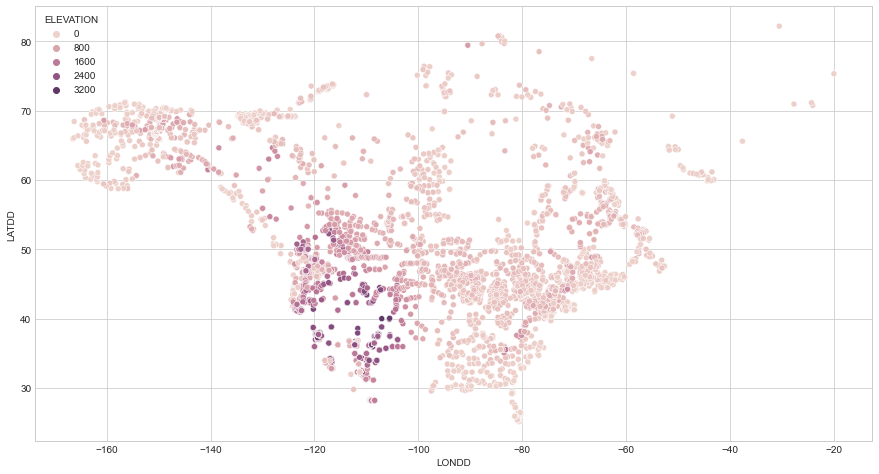

In [167]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df2, x="LONDD", y="LATDD", hue="ELEVATION", )

### Visualizamos diferencia de temperatura 

<AxesSubplot:xlabel='LONDD', ylabel='LATDD'>

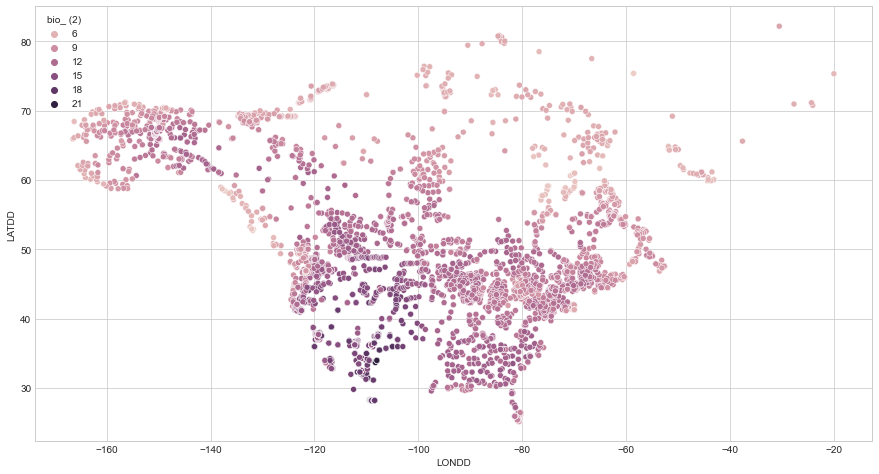

In [168]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df2, x="LONDD", y="LATDD", hue="bio_ (2)", )

## Dataset Fósil

In [85]:
df3 = pd.read_csv("data/fossil_set.csv")
df3.head()

,prof,edad,ABIES,ACACIA,ACANTHACEAE,ACER,ALNUS,AMBROSIA,ANACARDI,APIACEAE,...,THALICTRUM,TILIA,TRIXCAL,TSUGA,TYPHA,ULMUS,URTICACX,VERBEN,XANTHIUM,ZYGOPHYL
0,5.0,142,0.0,0.000000,0.000000,0,0.0,0.233051,0,0.0,...,0,0,0.0,0,0.000000,0,0.0,0.000000,0,0.0
1,10.0,347,0.0,0.005236,0.000000,0,0.0,0.099476,0,0.0,...,0,0,0.0,0,0.000000,0,0.0,0.000000,0,0.0
2,15.0,551,0.0,0.000000,0.005618,0,0.0,0.112360,0,0.0,...,0,0,0.0,0,0.000000,0,0.0,0.050562,0,0.0
3,21.0,796,0.0,0.000000,0.000000,0,0.0,0.051724,0,0.0,...,0,0,0.0,0,0.017241,0,0.0,0.068966,0,0.0
4,24.0,919,0.0,0.000000,0.000000,0,0.0,0.081325,0,0.0,...,0,0,0.0,0,0.009036,0,0.0,0.009036,0,0.0


### Reacomodamos el dataset para análsis

In [121]:
#Cambiamos columnas a renglones
df3_unpivoted = df3.melt(id_vars=['prof', 'edad'], var_name='taxón', value_name='porcentaje')
df3_unpivoted = df3_unpivoted[df3_unpivoted['porcentaje']> 0]
df3_unpivoted

,prof,edad,taxón,porcentaje
93,317.5,14826,ABIES,0.002703
95,322.5,15089,ABIES,0.002841
97,327.5,15351,ABIES,0.003106
98,330.0,15482,ABIES,0.002445
99,331.0,15535,ABIES,0.002342
...,...,...,...,...
12735,138.0,5578,ZYGOPHYL,0.003344
12739,156.0,6313,ZYGOPHYL,0.005988
12788,305.0,13487,ZYGOPHYL,0.001916
12793,317.5,14826,ZYGOPHYL,0.005405


### Graficamos

<AxesSubplot:xlabel='edad', ylabel='porcentaje'>

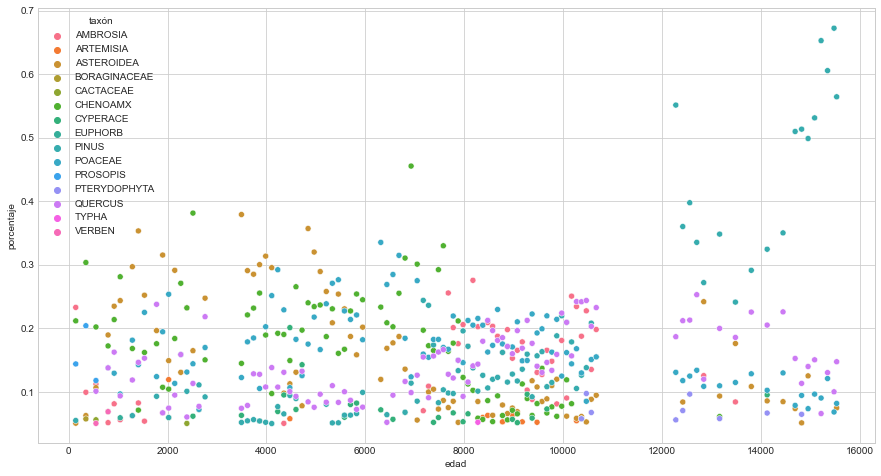

In [104]:
#Visalizamos los porcentajes atraves del tiempo
plt.figure(figsize=(15,8))
sns.scatterplot(data=df3_unpivoted[df3_unpivoted['porcentaje']> 0.05], x="edad", y="porcentaje", hue="taxón", )

### Reagrupamos

In [123]:
#Agrupamos 
df3_unpivoted_g = df3_unpivoted.groupby(['taxón'], as_index=False).sum('porcentaje')
df3_unpivoted_g.sort_values(by=['porcentaje'], ascending=False, inplace=True, )
df3_unpivoted_g

,taxón,prof,edad,porcentaje
49,POACEAE,18193.0,748621,16.538651
47,PINUS,18130.0,746171,15.884204
19,CHENOAMX,17862.0,733086,14.026902
55,QUERCUS,18193.0,748621,13.872609
8,ASTEROIDEA,17905.0,736340,13.180907
...,...,...,...,...
41,MANIHOT,246.0,9474,0.003268
9,BERBERIS,102.0,4107,0.003145
30,ERICACEAE,307.5,13808,0.002857
23,CRASSUL,325.0,15220,0.002445


### Composición general de muestras

Estamos suponiendo que todas las muestras tienen la misma cantidad de materia, con el objetivo de sumar los porcentajes de cada edad/profundidad

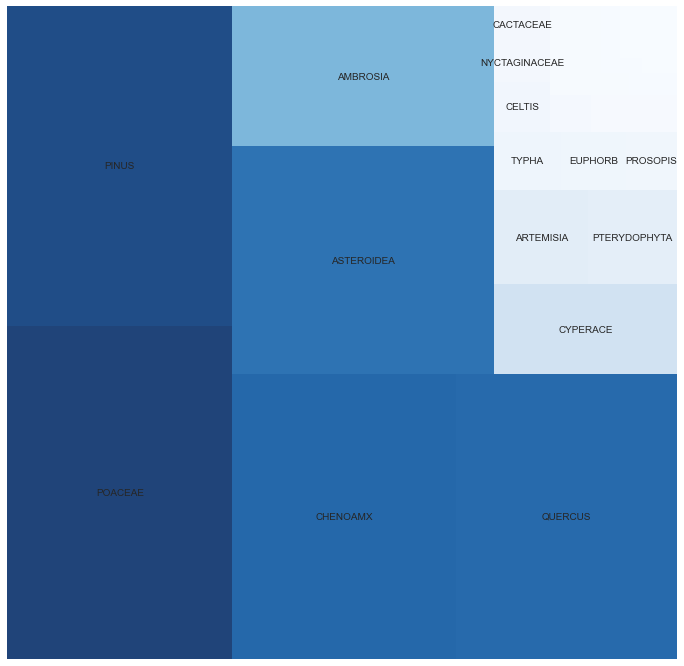

In [150]:
fig, ax = plt.subplots(1, figsize = (12,12))
cmap = plt.cm.Blues
mini=min(df3_unpivoted_g['porcentaje'])
maxi=max(df3_unpivoted_g['porcentaje'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df3_unpivoted_g['porcentaje']]

squarify.plot(sizes=df3_unpivoted_g['porcentaje'], 
              label=df3_unpivoted_g['taxón'][:15],
              color = colors,
              alpha=.9 )
plt.axis('off')
plt.show()

### Visualizamos la profundidad vs edad

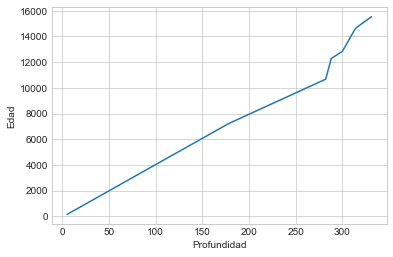

In [24]:
x = df3['prof']
y = df3['edad']
plt.xlabel("Profundidad")
plt.ylabel("Edad")
plt.plot(x, y,'-');

### PCA

In [43]:
# Separamos los features del target
x = df3.drop(columns=['edad', 'prof']).values
# Separamos el target de los datos (edad o prof)
y = df3.loc[:,['prof']].values
# Estandarizamos/Normalizamos
x = StandardScaler().fit_transform(x)

#Ajustamos modelo, no ajustamos a -n- componentes para calcular ese valor
#con la varianza explicada
pca = PCA()
principalComponents = pca.fit_transform(x)

In [64]:
pca.explained_variance_

array([6.88541844e+00, 5.74536955e+00, 3.81466556e+00, 3.62088971e+00,
       2.98116833e+00, 2.83210955e+00, 2.51655043e+00, 2.33149385e+00,
       2.13969932e+00, 2.12373656e+00, 2.00511384e+00, 1.88174590e+00,
       1.78549054e+00, 1.76090172e+00, 1.67983754e+00, 1.53825801e+00,
       1.48469240e+00, 1.41985903e+00, 1.37446164e+00, 1.26948065e+00,
       1.19141220e+00, 1.14595828e+00, 1.10288571e+00, 1.07997692e+00,
       1.03820304e+00, 1.01965285e+00, 9.65556455e-01, 9.01638334e-01,
       8.33452365e-01, 8.13894165e-01, 7.56967955e-01, 7.35193937e-01,
       7.01940244e-01, 6.78029370e-01, 6.42431204e-01, 5.73599084e-01,
       5.64749612e-01, 5.34933919e-01, 4.79704896e-01, 4.49864545e-01,
       4.06598937e-01, 3.82940544e-01, 3.57640880e-01, 3.41067407e-01,
       2.97813732e-01, 2.76392501e-01, 2.45880503e-01, 2.26002141e-01,
       2.18165675e-01, 1.94397112e-01, 1.91099398e-01, 1.55900853e-01,
       1.49592841e-01, 1.17053527e-01, 1.05094504e-01, 9.73402830e-02,
      